In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix


warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
df = pd.read_csv('/content/churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df2=df.iloc[:,1:]
df2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [12]:
# Replace churn string values with numeric binary values
df2.Churn.replace({"Yes":1, "No":0}, inplace = True)

dummy_df = pd.get_dummies(df2)
dummy_df.to_csv('/content/churn_data.csv')
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 6576 entries, SeniorCitizen to TotalCharges_999.9
dtypes: float64(1), int64(3), uint8(6572)
memory usage: 44.4 MB


#Visualization 

#Pre-processing of data

In [13]:
y = dummy_df.Churn.values
X = dummy_df.drop('Churn', axis = 1)
cols = X.columns

In [14]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))
X.columns = cols

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 33)

In [16]:
from sklearn.linear_model import LogisticRegression
# Instantiate a logistic regression model without an intercept, arbitrarily large C value will offset the lack of intercept
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver 
= 'liblinear')
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [17]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [19]:
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train - y_hat_train)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0    5221
1      61
dtype: int64
----------------------------------
0    0.988451
1    0.011549
dtype: float64


##Train Set Results:

*   5221 Correct (61 Incorrect)
*   98% Accuracy




In [20]:
# Repeat previous step with test data
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('---------------------------------')
print(pd.Series(residuals).value_counts(normalize = True))

0    1351
1     410
dtype: int64
---------------------------------
0    0.767178
1    0.232822
dtype: float64


##Test Set Results:


*   1351 Correct (410 Incorrect)
*   76.7% Accuracy




In [21]:
from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y_test, y_hat_test)

In [42]:
def print_metrics(y_train, y_hat_train, y_test, y_hat_test):
    print('Training Metrics:')
    print(f'Training Precision: ', round(precision_score(y_train, y_hat_train), 2))
    print(f'Training Recall: ', round(recall_score(y_train, y_hat_train), 2))
    print(f'Training Accuracy: ', round(accuracy_score(y_train, y_hat_train), 2))
    print(f'Training F1-Score: ', round(f1_score(y_train, y_hat_train), 2))
    print('\n')
    print(f'Testing Metrics:')
    print(f'Testing Precision: ', round(precision_score(y_test, y_hat_test),2))
    print(f'Testing Recall: ', round(recall_score(y_test, y_hat_test),2))
    print(f'Testing Accuracy: ', round(accuracy_score(y_test, y_hat_test),2))
    print(f'Testing F1-Score: ', round(f1_score(y_test, y_hat_test),2))
    
    
def print_metric_comparisons(X, y):
    
    # Create an empty list for each of the 4 classification metrics (Precision/Recall/Accuracy/F1-Score)
    training_precision = []
    testing_precision = []
    training_recall = []
    testing_recall = []
    training_accuracy = []
    testing_accuracy = []
    training_f1 = []
    testing_f1 = []
    
    # Iterate through a range of test_sizes to use for our logistic regression, using same parameters as our first logistic regression in our notebook. Append each respective result metric to its respective list.
    for i in range(10, 95):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100.0, random_state = 33)
        logreg = LogisticRegression(fit_intercept=False, C=1e25, solver='liblinear')
        model_log = logreg.fit(X_train, y_train)
        y_hat_test = logreg.predict(X_test)
        y_hat_train = logreg.predict(X_train)

        training_precision.append(precision_score(y_train, y_hat_train))
        testing_precision.append(precision_score(y_test, y_hat_test))
        training_recall.append(recall_score(y_train, y_hat_train))
        testing_recall.append(recall_score(y_test, y_hat_test))
        training_accuracy.append(accuracy_score(y_train, y_hat_train))
        testing_accuracy.append(accuracy_score(y_test, y_hat_test))
        training_f1.append(f1_score(y_train, y_hat_train))
        testing_f1.append(f1_score(y_test, y_hat_test))

In [43]:
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1132  149]
 [ 261  219]]


In [44]:
print_metrics(y_train, y_hat_train, y_test, y_hat_test)

Training Metrics:
Training Precision:  0.98
Training Recall:  0.98
Training Accuracy:  0.99
Training F1-Score:  0.98


Testing Metrics:
Testing Precision:  0.6
Testing Recall:  0.46
Testing Accuracy:  0.77
Testing F1-Score:  0.52


In [77]:
def plot_auc(model, X_train, X_test, y_train, y_test):
    
    # Calculate probability score of each point in training set
    y_train_score = model.decision_function(X_train)
    # Calculate false positive rate, true positive rate, and thresholds for training set
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    # Calculate probability score of each point in test set
    y_test_score = model.decision_function(X_test)
    # Calculate false positive rate, true positive rate, and thresholds for test set
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    
    # Print Area-Under-Curve scores
    print('Training AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    
    plt.figure(figsize = (20, 8))
    lw = 2
    
    # Use Train False/True Positive ratios to plot receiver operating characteristic curve for training set
    plt.subplot(121)
    plt.plot(train_fpr, train_tpr, color = 'red', lw = lw, label = 'ROC Curve')
    # Plot positive line w/ slope = 1 for ROC-curve reference
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
    plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
    plt.title('Receiver operating characteristic (ROC) Curve for Training Set', fontweight = 'bold', fontsize = 20)
    plt.legend(loc='lower right')

    # Use Test False/True positive ratios to plot receiver operating characteristic curve for test set
    plt.subplot(122)
    plt.plot(test_fpr, test_tpr, color='red',
         lw=lw, label='ROC curve')
    # Plot positive line w/ slope = 1 for ROC-curve reference
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate', fontweight = 'bold', fontsize = 20)
    plt.ylabel('True Positive Rate', fontweight = 'bold', fontsize = 20)
    plt.title('Receiver operating characteristic (ROC) Curve for Test Set', fontweight = 'bold', fontsize = 20)
    plt.legend(loc='lower right')
    
    plt.savefig('/content/roc_curve.png')
    
    plt.tight_layout()

    
def find_best_k(X_train, y_train, X_test, y_test, min_k = 1, max_k = 100):
    best_k = 0
    best_score = 0.0
    
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
            
    print(f"Best Value for K: {best_k}")
    print(f"F1-Score: {best_score}")
    

def viz_roc(fpr, tpr, roc_auc, string):
    
    plt.style.use('ggplot')
    plt.figure(figsize = (10, 10))
    plt.plot(fpr, tpr, lw = 2, label = f"{string} AUC = "+str(roc_auc))
    plt.plot([0,1], [0,1], lw = 2, ls = '--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate', fontweight = 'bold', fontsize = 20)
    plt.ylabel('True Positive Rate', fontweight = 'bold', fontsize = 20)
    plt.title(f'ROC Curve: {string}', fontsize = 25, fontweight = 'bold')
    plt.legend(loc = 4, fontsize =15)
    plt.tight_layout()

Training AUC: 0.9995689222334599
Test AUC: 0.7978028233151184


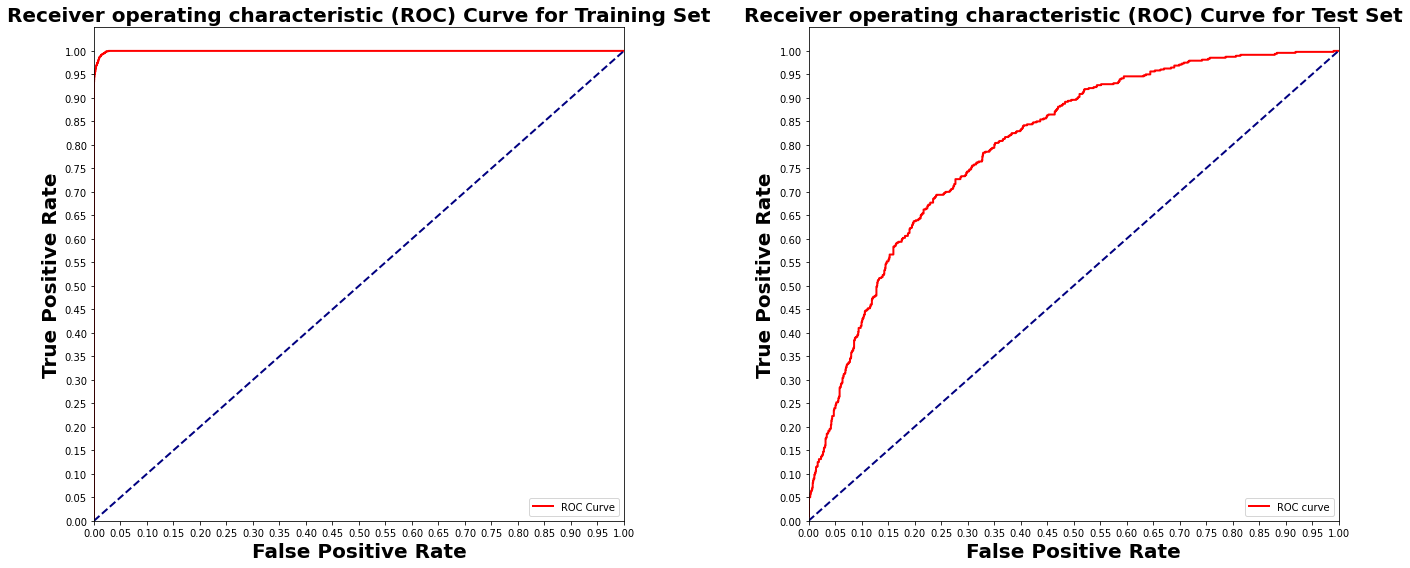

In [78]:
plot_auc(logreg, X_train, X_test, y_train, y_test)


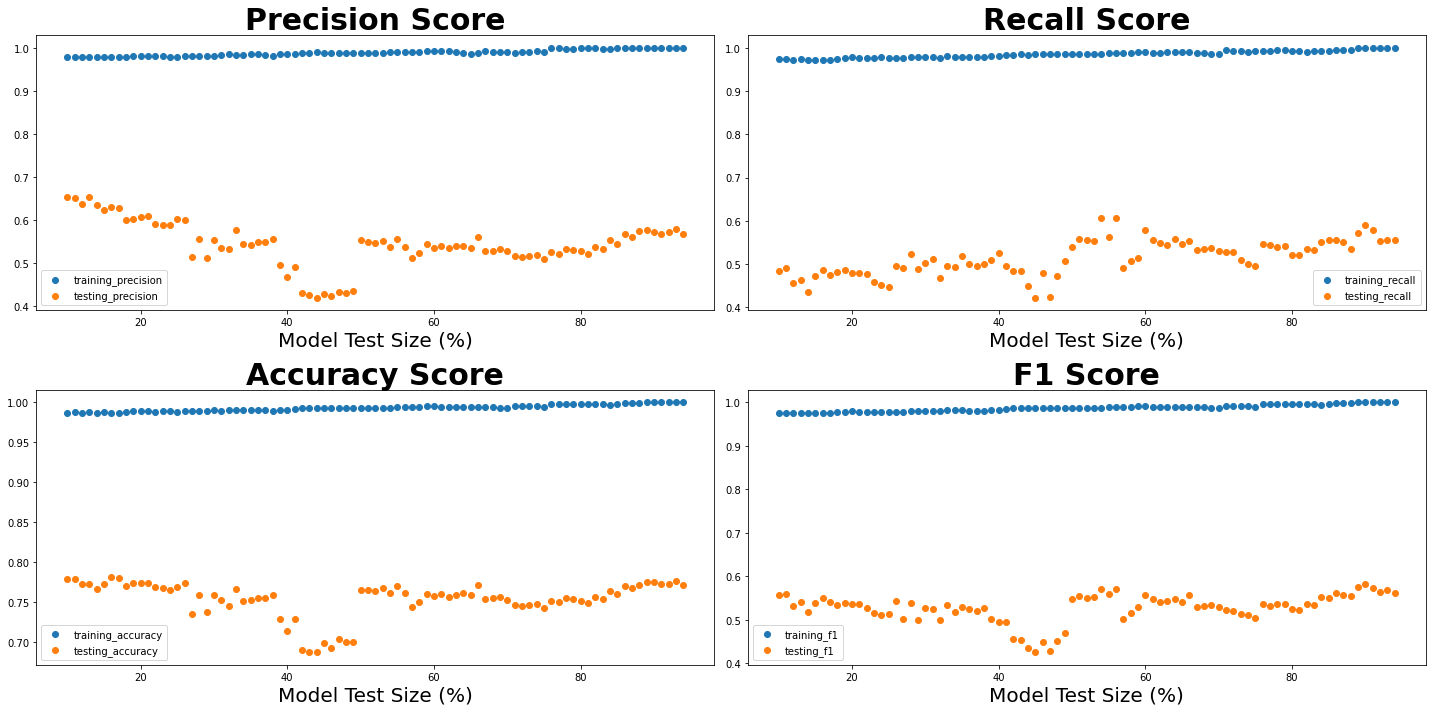

In [79]:
print_metric_comparisons(X, y)